In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# EDA on MovieLens Small dataset

In [2]:
ratings_data = "/scratch/work/courses/DSGA1004-2021/movielens/ml-latest-small/ratings.csv"

In [3]:
ratings_csv = pd.read_csv(ratings_data, sep=',', encoding='latin-1')
print ('Shape of ratings:{}'.format(ratings_csv.shape))
ratings_csv.head()

Shape of ratings:(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
ratings_csv.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

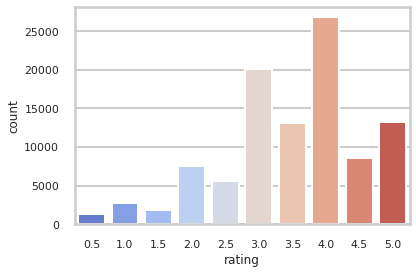

In [22]:
sns.set_context('poster', font_scale = 0.5)
sns.countplot(x ='rating', data = ratings_csv, palette ='coolwarm')

In [6]:
movies_data = "/scratch/work/courses/DSGA1004-2021/movielens/ml-latest-small/movies.csv"

In [7]:
movies_csv = pd.read_csv(movies_data, sep=',', encoding='latin-1')
print ('Shape of movies:{}'.format(movies_csv.shape))
movies_csv.head()

Shape of movies:(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
movies_csv.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [14]:
ratings_csv = ratings_csv.drop('timestamp',axis=1)
join = pd.merge(ratings_csv, movies_csv, on='movieId')
join.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [15]:
join.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Sorority House Massacre (1986)                   5.0
Bill Hicks: Revelations (1993)                   5.0
My Man Godfrey (1957)                            5.0
Hellbenders (2012)                               5.0
In the blue sea, in the white foam. (1984)       5.0
Name: rating, dtype: float64

In [18]:
join.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

In [25]:
data2 = pd.DataFrame(join.groupby('title')['rating'].mean())
data2['number of ratings'] = pd.DataFrame(join.groupby('title')['rating'].count())

In [27]:
data2.head(10)

,rating,number of ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
'Tis the Season for Love (2015),1.500000,1
"'burbs, The (1989)",3.176471,17
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.666667,42


# EDA on MovieLens large dataset

In [3]:
ratings_data_large = "/scratch/work/courses/DSGA1004-2021/movielens/ml-latest/ratings.csv"

In [ ]:
ratings_csv2 = pd.read_csv(ratings_data_large, sep=',', encoding='latin-1')
# print ('Shape of ratings:{}'.format(ratings_csv2.shape))
# ratings_csv2.head()